### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptarán consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)



# Tarea 2: Filtrado de señales

## Introducción


Un **electrocardiograma (ECG)** es un gráfico de voltaje (amplitud) en función del tiempo correspondiente a la actividad eléctrica del corazón. Cada etapa del ciclo cardíaco es representado por una letra: **P, Q, R, S y T**. La siguiente figura muestra un esquema de un ECG con dos pulsos.

<img src="cardio.png" width="600">


El ECG se usa para hacer diagnósticos y en particular para analizar la existencia de anormalidades en el ciclo cardiaco. La **frecuencia cardiaca**, es decir el inverso del intervalo RR, de un humano normal en reposo está en el rango de **60 y 100 latidos por minuto**



## Enunciado

El hospital base de Valdivia tiene un electrocardiógrafo que mide la ECG en miliVolts [mV] a una frecuencia de muestreo de $360$ [Hz]

Durante el proceso de captura ciertos errores provocaron que la señal se contamine con 

- **(A)** Un ruido asociado al sistema eléctrico
- **(B)** Un ruido de baja frecuencia causado por un desperfecto del sensor
- **(C)** Un ruido blanco de origen térmico 

Esto complica el análisis del médico por lo que el hospital base los contrata a ustedes para **diseñar un filtro que limpie la señal ECG**

Resuelva las actividades que se piden a continuación, respondiendo y analizando donde corresponda

<IPython.core.display.Javascript object>


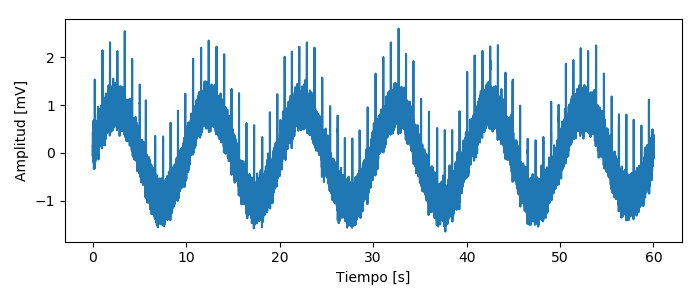

In [1]:
import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pylab as plt
import scipy.signal
from scipy import fftpack

with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)

Fs = 360
time = np.arange(len(data))/Fs
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

## Análisis (15%)

- Observe los primeros dos segundos de la señal, compare con el esquema mostrado en la introducción y discuta sobre los efectos causados por los ruidos **A**, **B** y **C** mencionados en el enunciado. Además responda  ¿Qué es un ruido blanco y que tipo de efecto introduce en la señal y en su espectro? ¿Qué es una tendencia y que tipo de efecto introduce en la señal y su espectro? 
- Calcule y muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia y su espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los *trade-off* aprendidos en clases
- En base a la señal, su espectro de magnitud y su espectrograma identifique la frecuencia central o el rango de frecuencias asociada a las tres fuentes de ruido. ¿En qué rango de frecuencias (Hz) se espera encontrar la señal de ritmo cardíaco de un humano normal en reposo?


<IPython.core.display.Javascript object>


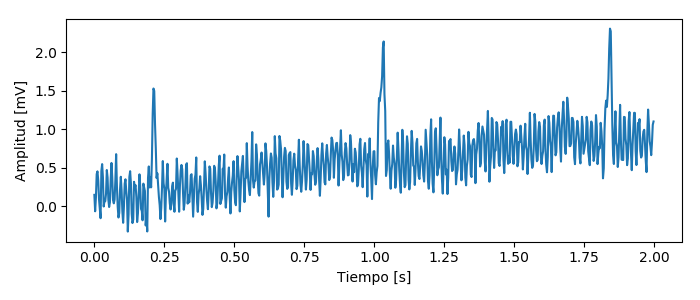

In [2]:
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time[:2*Fs], data[:2*Fs])
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

In [ ]:
# explicar 

In [3]:
def fourierfun(signal,Fs):
    data = fftpack.fft(signal)
    data_freq = fftpack.fftfreq(n=len(data), d=1/Fs)
    data_amp = np.abs(data)
    data_angle = np.angle(data)
    return data_freq,data_amp,data_angle

<IPython.core.display.Javascript object>


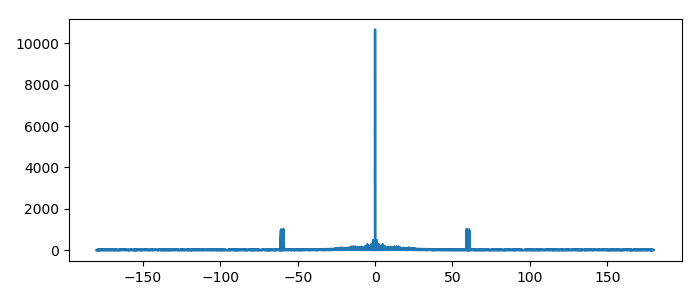

In [4]:
freqs,SA,SP=fourierfun(data,Fs)

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(fftpack.fftshift(freqs),fftpack.fftshift(SA))

<IPython.core.display.Javascript object>


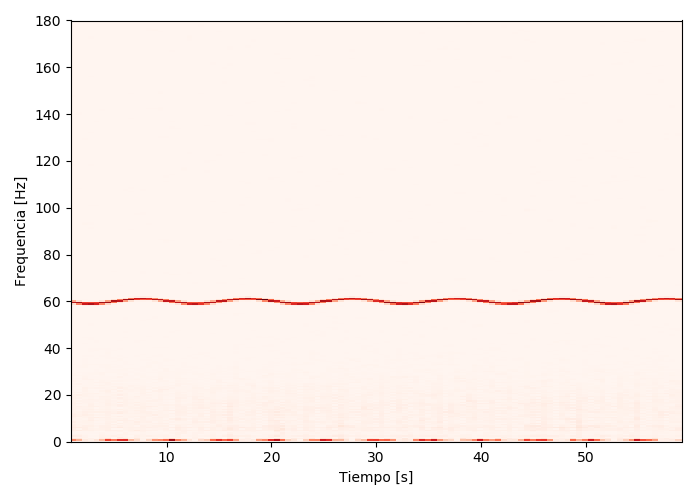

In [5]:
# espectogrma
Nw = 600
beta = 6.
freqs, times, Sxx = scipy.signal.spectrogram(data, fs=Fs, nperseg=Nw, 
                                                 noverlap=Nw//1.5, window=('kaiser', beta))
fig, ax = plt.subplots(figsize=(7, 5), tight_layout=True, sharex=True, sharey=True)
ax.pcolormesh(times, freqs, Sxx, cmap=plt.cm.Reds, shading='auto');
ax.set_ylabel('Frequencia [Hz]');
ax.set_xlabel('Tiempo [s]');

In [ ]:
# explicar

## Filtrado FIR (50%)

Describa lo que es un filtro FIR, explique paso a paso el método de enventanado y describa los argumentos y el valor de retorno de la función `scipy.signal.firwin`. 

Luego use este método para diseñar y aplicar tres filtros sobre la señal de entrada. El primero debe filtrar el ruido **(A)**, el segundo el ruido **(B)** y el tercero el ruido **(C)**. Indique la(s) frecuencia(s) de corte y el tipo de filtro en cada caso. Justifique su elección en base a sus observaciones en el paso anterior.

Considere una ventana de Hamming y $1001$ coeficientes para el filtro

Por cada filtro:
- Muestre la respuesta al impulso y la respuesta en frecuencia resultantes
- Filtre la señal convolucionando con la respuesta al impulso
- Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso? Luego muestre gráficamente el espectro de magnitud y el espectrograma de la señal restada. En base a lo que observa y a los gráficos del punto anterior discuta sobre la efectividad del filtro

Finalmente
- Filtre la señal convolucionando con los tres filtros. Muestre el resultado graficamente. 
- Muestre un acercamiento de los primeros tres segundos de la señal filtrada, reconozca la fase R y márquela con una linea roja punteada.
- Cree una función que mida el tiempo RR en la señal filtrada. Grafique la frecuencia cardiaca en función del tiempo. ¿Se encuentra la persona en el rango sano o no?

In [ ]:
# explicar que es un filtro fir

### Filtro A

<IPython.core.display.Javascript object>


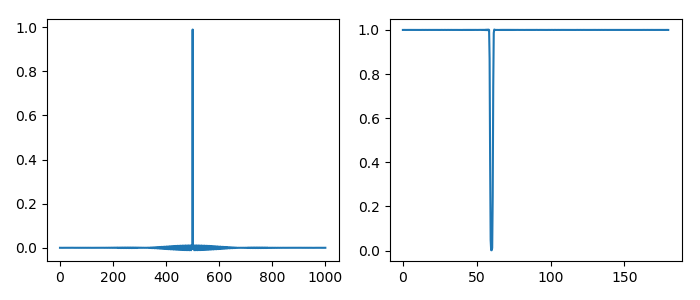

In [45]:
L = 1001

# ruido asociado al sistema electrico 60 Hz aprox
filtroA = scipy.signal.firwin(L, [59,61], window='hamming', pass_zero=True, fs=Fs)
freq, H = scipy.signal.freqz(filtroA, fs=Fs)

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(filtroA)
ax[1].plot(freq, np.absolute(H))

<IPython.core.display.Javascript object>


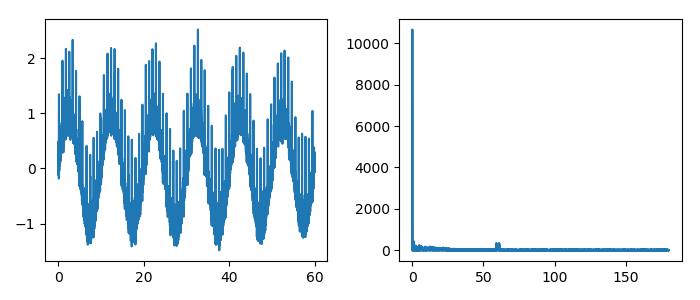

In [44]:
# convolucion con filtro A
yA = scipy.signal.convolve(data, filtroA, mode='same')
YA = fftpack.rfft(yA)
freqs = fftpack.rfftfreq(n=len(yA), d=1/Fs)

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(time[:len(yA)], yA)
ax[1].plot(freqs, np.absolute(YA))

In [ ]:
# al restar la senal filtrada de la original de beria quedar lo que se filtro
# en este caso ruido electrico de 60 Hz

<IPython.core.display.Javascript object>


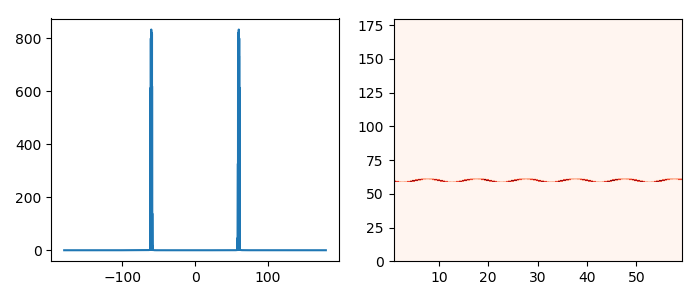

In [46]:
# resta con filtro A
rA = data[:len(yA)] - yA

freqs1, SA, SP=fourierfun(rA,Fs)
freqs2, times, Sxx = scipy.signal.spectrogram(rA, fs=Fs, nperseg=Nw, 
                                                 noverlap=Nw//1.5, window=('kaiser', beta))

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(fftpack.fftshift(freqs1),fftpack.fftshift(SA))
ax[1].pcolormesh(times, freqs2, Sxx, cmap=plt.cm.Reds, shading='auto');

In [ ]:
# discutir efectividad filtro A

### Filtro B

<IPython.core.display.Javascript object>


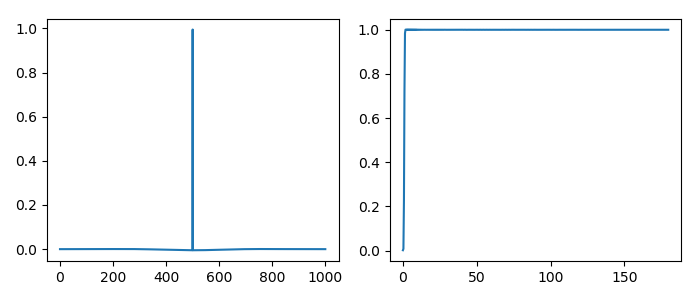

In [48]:
# 1-1.6 latidos por segundo
# ruido de baja frecuencia < 1 Hz
filtroB = scipy.signal.firwin(L, 0.9, window='hamming', pass_zero=False, fs=Fs)
freq, H = scipy.signal.freqz(filtroB, fs=Fs)

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(filtroB)
ax[1].plot(freq, np.absolute(H))

<IPython.core.display.Javascript object>


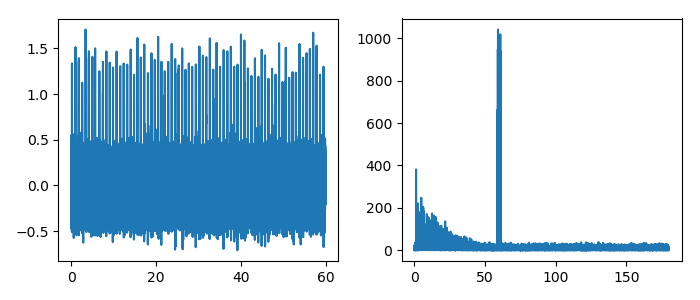

In [49]:
yB = scipy.signal.convolve(data, filtroB, mode='same')
YB = fftpack.rfft(yB)
freqs = fftpack.rfftfreq(n=len(yB), d=1/Fs)

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(time[:len(yB)], yB)
ax[1].plot(freqs, np.absolute(YB))

In [ ]:
# en este caso deberian quedar las senales < 0.9 Hz

<IPython.core.display.Javascript object>


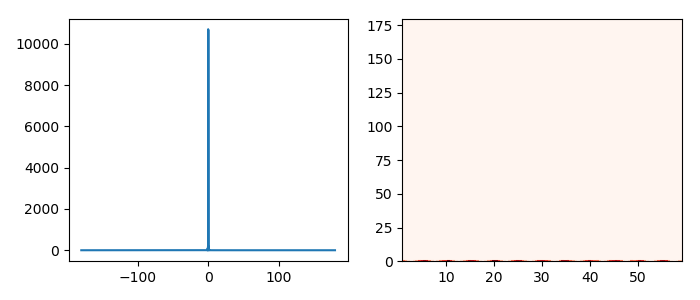

In [50]:
# resta filtro B
rB = data[:len(yB)] - yB

freqs1, SA, SP=fourierfun(rB,Fs)
freqs2, times, Sxx = scipy.signal.spectrogram(rB, fs=Fs, nperseg=Nw, 
                                                 noverlap=Nw//1.5, window=('kaiser', beta))

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(fftpack.fftshift(freqs1),fftpack.fftshift(SA))
ax[1].pcolormesh(times, freqs2, Sxx, cmap=plt.cm.Reds, shading='auto');

In [ ]:
# discutir efectividad filtro B

### Filtro C

In [ ]:
# ruido blanco ???

# filtrar convolucionando con resp al impulso
# resta entre senal original y senal filtrada
# explicar

<IPython.core.display.Javascript object>


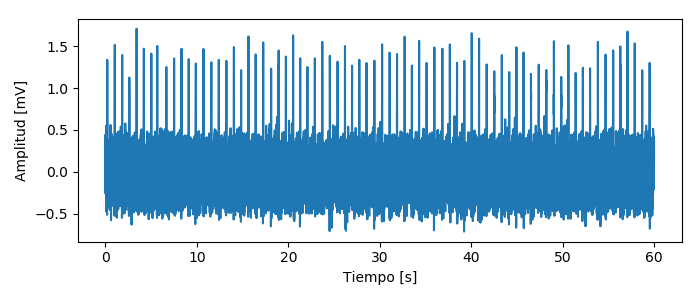

In [98]:
# filtrar
fil_fir = scipy.signal.convolve(data, filtroA, mode='same')
fil_fir = scipy.signal.convolve(data, filtroB, mode='same')
#fil = scipy.signal.convolve(data, filtroC, mode='same')

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, fil)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');


<IPython.core.display.Javascript object>


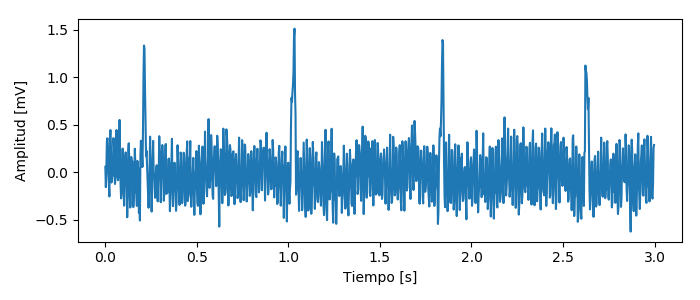

In [99]:
# mostrar 3 seg, marcar fase R
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time[:3*Fs], fil[:3*Fs])
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');


In [66]:
# funcion que mida tiempo RR
# arreglar
def RR(signal, Fs):
    t = np.argwhere(signal > 1)
    return (t[3] - t[0]) / Fs
RR(fil, Fs)

array([0.81944444])

## Filtrado IIR (35%)

Describa los filtros IIR y compárelo con los filtros FIR. Describa los argumentos y el valor de retorno de la función `scipy.signal.iirfilter`.

Luego use este método para diseñar tres filtros. Los filtros deben cumplir el mismo propósito que en el caso anterior. Considere filtros IIR de tipo `butterworth` y todos del mismo orden. Aplique los filtros sobre la señal de entrada usando la función `scipy.signal.lfilter`.

El objetivo es encontrar el mínimo orden para los filtros IIR tal que el error medio cuadrático entre la señal filtrada IIR y la señal filtrada FIR sea menor que un 1% de la varianza de la señal filtrada FIR. Es decir que si $x$ es la señal filtrada IIR e $y$ es la señal filtrada FIR donde $N = \min(\text{len}(x), \text{len}(y))$ se cumpla que

$$
\sum_{i=1}^N (x_i - y_i)^2 < 0.01 \sum_{i=1}^N (y_i - \bar y_i)^2
$$

Finalmente, discuta sobre sus hallazgos muestre gráficamente el resultado del mejor filtro IIR


In [70]:
# describir filtros iir, comparar con fir, argumentos y return de iirfilter()

<IPython.core.display.Javascript object>


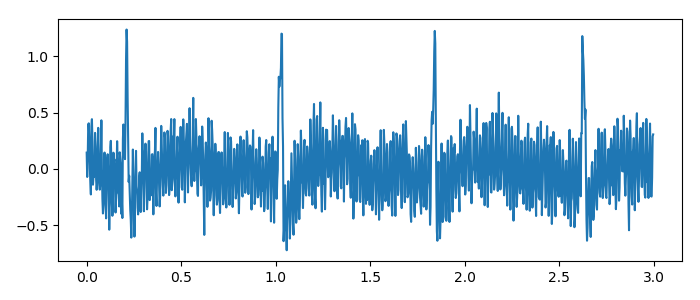

In [100]:
# btype : {'bandpass', 'lowpass', 'highpass', 'bandstop'}
bA, aA = scipy.signal.iirfilter(N=6, Wn=[59, 61], fs=Fs, ftype='butterworth', btype='bandstop') # filtro A
bB, aB = scipy.signal.iirfilter(N=6, Wn=0.9, fs=Fs, ftype='butterworth', btype='highpass') # filtro B
# filtro C

fil_iir = scipy.signal.lfilter(bA, aA, data)
fil_iir = scipy.signal.lfilter(bB, aB, data)
#fil_iir = scipy.signal.lfilter(bC, aC, data)

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time[:3*Fs], fil_iir[:3*Fs])

In [104]:
def mse(A, B):
    return np.sum(np.square(A - B))

fir_mse = mse(data, fil_fir)

n = 1
iir_mse = 1e9
while (iir_mse >= 0.01 * fir_mse):
    bA, aA = scipy.signal.iirfilter(N=n, Wn=[59, 61], fs=Fs, ftype='butterworth', btype='bandstop') # filtro A
    bB, aB = scipy.signal.iirfilter(N=n, Wn=0.9, fs=Fs, ftype='butterworth', btype='highpass') # filtro B
    # filtro C

    fil_iir = scipy.signal.lfilter(bA, aA, data)
    fil_iir = scipy.signal.lfilter(bB, aB, data)
    #fil_iir = scipy.signal.lfilter(bC, aC, data)
    iir_mse = mse(fil_iir, fil_fir)
    n += 1
    
display(n)

3